In [1]:
import numpy as np
import pandas as pd
import numpy.random as random
import matplotlib.pyplot as plt

In [20]:
def mul_ten_and_mat(tensor, matrix):
    ten_shape = tensor.shape
    result = np.zeros((ten_shape[0], ten_shape[2]))
    for i in range(ten_shape[2]):
        result[:,i] = tensor[:,:,i].dot(matrix[:,i])
    return result

random.seed(99)

N = 4000
l = 20
A1 = np.zeros((l,l,l))
np.fill_diagonal(A1[0], 0.8)
tmp = np.repeat(0.5, l**2).reshape((l,l))

anomaly_start = N - 1000
data = np.zeros((N, l, l))
data[0] = tmp
e = .1
for i in range(1, anomaly_start):
    data[i] = mul_ten_and_mat(A1, data[i-1]) + random.uniform(0, e, (l, l))
for i in range(anomaly_start, N):
    e += 0.00001
    data[i] = mul_ten_and_mat(A1, data[i-1]) + random.uniform(0, e, (l, l))


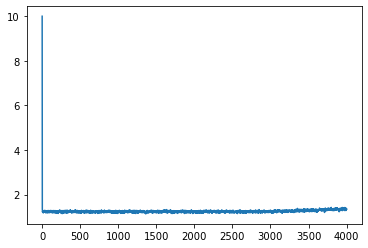

In [21]:
norms = []
for obs in data:
    norms.append(np.linalg.norm(obs))
plt.plot(norms)

In [13]:
for i in range(N):
    np.savetxt(f"Observation{i}.txt", data[i])